In [2]:
%pip install markovify wordcloud nltk geopy 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 791.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 915.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 9.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 14.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.5 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.9 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.8 MB/s eta 0:00:00ta 0

In [3]:
import pandas as pd
import numpy as np
import plotly as plt
import seaborn as sn
import markovify
import matplotlib.pyplot as mplt
import math
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import geopy
import ast
import copy
from geopy.geocoders import Nominatim
import plotly.express as px
from PIL import Image, ImageDraw, ImageFont

In [4]:
post_df_full = pd.read_csv("cleaned.csv", low_memory=False)

In [5]:
# split the reaction to columns of each type of reaction, and fill null values or zeros with mean value
reactions = ['like','love', 'haha','wow','care','angry','sad']
for reaction in reactions:
    mean_value = post_df_full[post_df_full[reaction] != 0][reaction].median()
    post_df_full[reaction] = post_df_full[reaction].replace(0, math.ceil(mean_value))

In [6]:
reacts = dict()
for reaction in reactions:
    reacts[reaction] = post_df_full[reaction].sum()
reacts['comments'] = post_df_full['comments'].sum()
reacts['shares'] = post_df_full['shares'].sum()
fig = px.pie(values=list(reacts.values()), names=list(reacts.keys()), title='Interactions')
fig.update_layout(
    width=500,
    height=400, 
)
fig.show()


<Axes: xlabel='# of post', ylabel='interactions'>

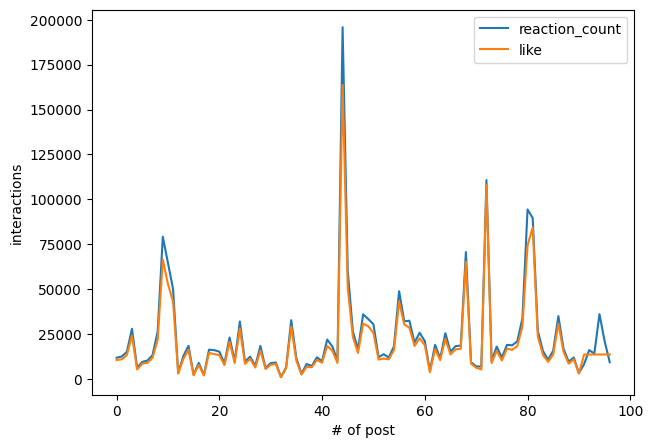

In [7]:
post_df_full[["reaction_count", "like"]].plot(kind="line", xlabel="# of post", ylabel="interactions", figsize=(7,5))

In [8]:
wide_df = post_df_full[reactions]
fig = px.bar(wide_df, y=reactions, title="reactions count for each post")
fig.update_layout(
    yaxis_title='reaction count',
    xaxis_title='# of post',
)
fig.show()

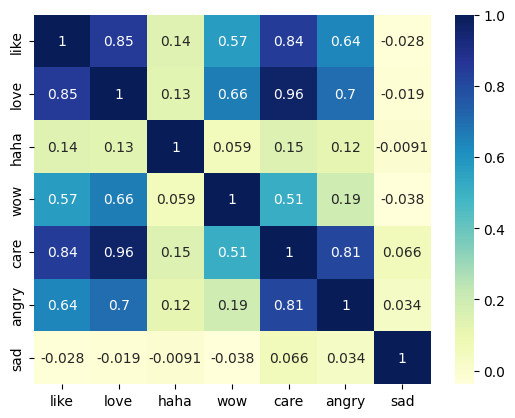

In [9]:
hm = sn.heatmap(data=post_df_full[reactions].corr(), cmap="YlGnBu", annot=True) 

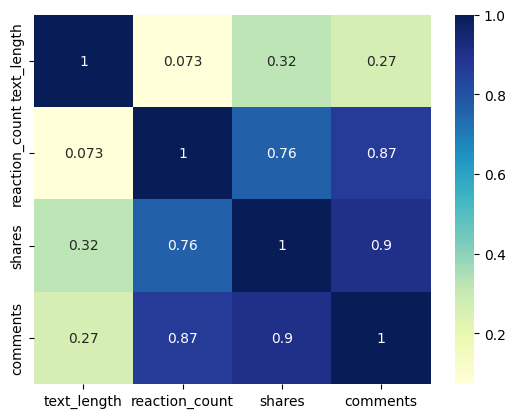

In [10]:
hm = sn.heatmap(data=post_df_full[["text_length", "reaction_count", "shares", "comments"]].corr(), cmap="YlGnBu", annot=True) 

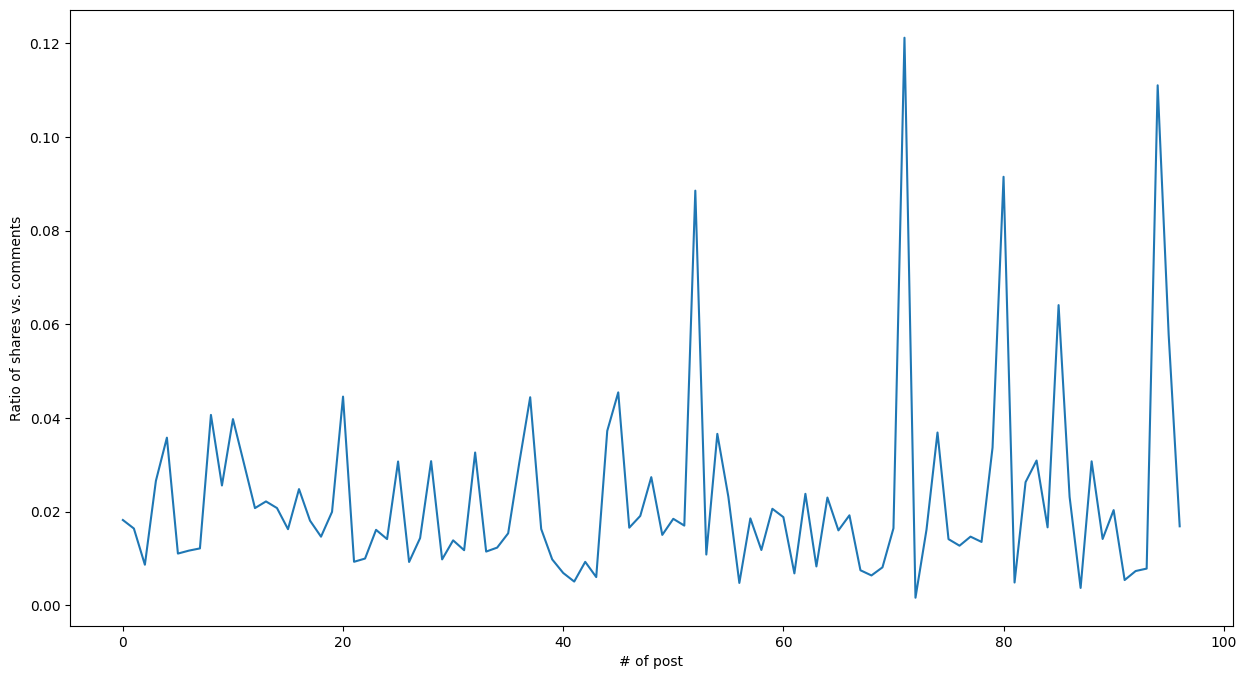

In [11]:
fig = (post_df_full["shares"]/post_df_full["like"]).plot(kind="line", xlabel="# of post", ylabel="Ratio of shares vs. comments", figsize=(15,8))

In [12]:
big_blob_of_text = post_df_full['post_text'].str.cat(sep=' ')
text_model = markovify.Text(big_blob_of_text)

for i in range(5):
    print(text_model.make_sentence())
    print()

Thank you Nike for the challenges that we introduce our new NN Running Team Let us run into a new challenge.

On my road to the fastest streets in the streets of Nairobi Its good to be back in the world.

Its great to experience and meet with so many fans who share the same course continuing the legacy of our worldchanging event.

The training is different but we share the same course continuing the legacy of our worldchanging event.

Twenty years ago, Nike and I can say that I am ready to go back to my special place.



In [13]:
big_comment = post_df_full['comments_text'].str.cat(sep=' ')
comment_text_model = markovify.Text(big_comment)

# Generate sentences
print()
for i in range(5):
    print(comment_text_model.make_sentence())
    print()


Keep going . Our son of Kenya best of luck the GOAT.

We are proud of you to mentor our own ways.

Keep up the neat toil..

My all time to prove anything to anyone.

You are a wise and discipline pays.. congratulations . Congratulations champ.



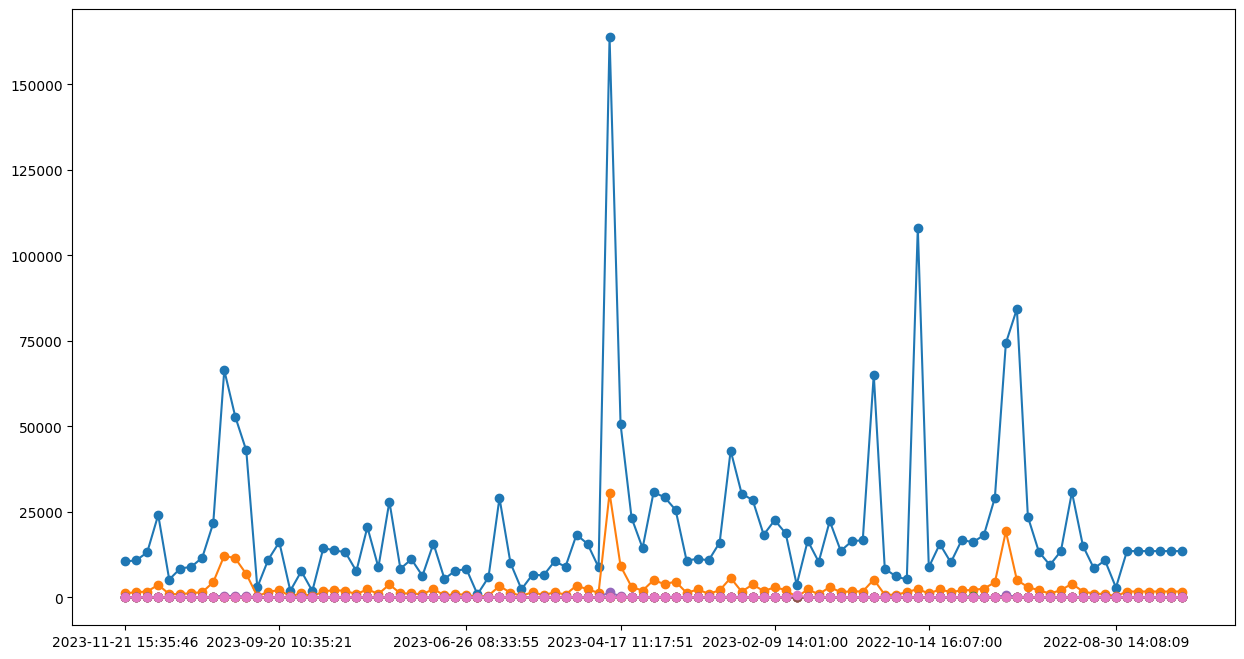

In [14]:
fig,ax = mplt.subplots(figsize=(15,8))
# for reaction in ['haha','wow','angry', 'sad']:
for reaction in reactions:
    ax.plot(post_df_full['time'], post_df_full[reaction], label=reaction, marker="o")

# mplt.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

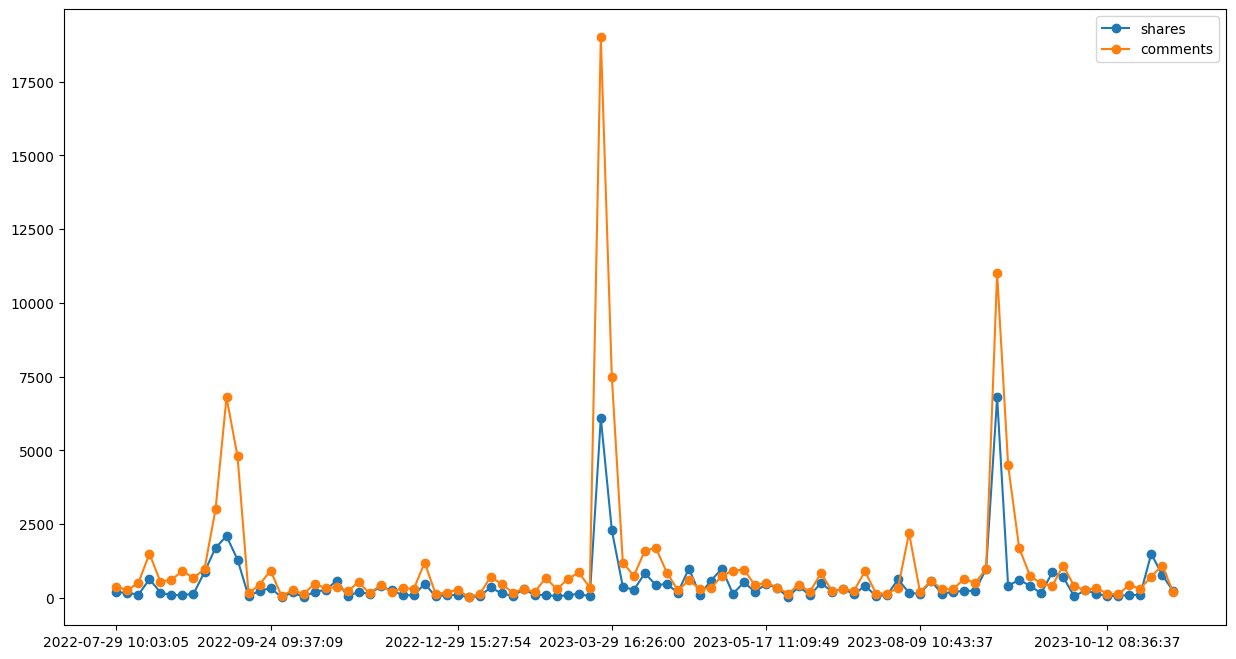

In [15]:
fig,ax = mplt.subplots(figsize=(15,8))
ax.plot(post_df_full['time'][::-1], post_df_full["shares"], label="shares", marker="o")
ax.plot(post_df_full['time'][::-1], post_df_full["comments"], label="comments", marker="o")

mplt.legend()
# ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

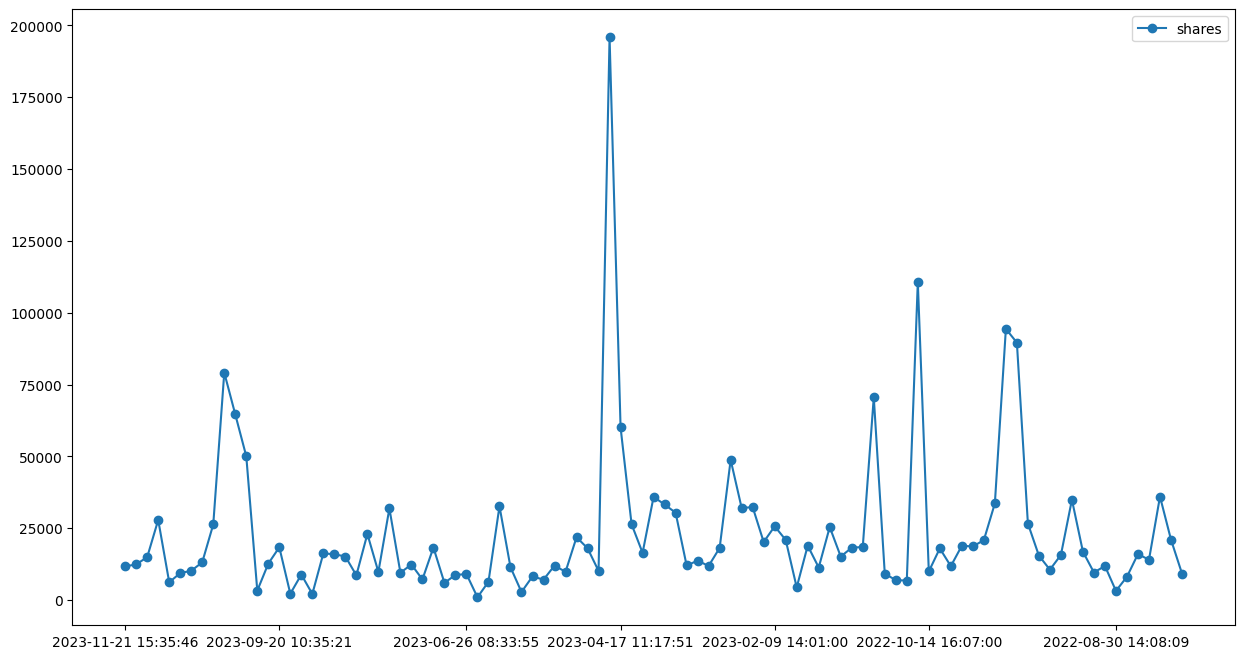

In [16]:
fig,ax = mplt.subplots(figsize=(15,8))
ax.plot(post_df_full['time'], post_df_full["reaction_count"], label="shares", marker="o")

mplt.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

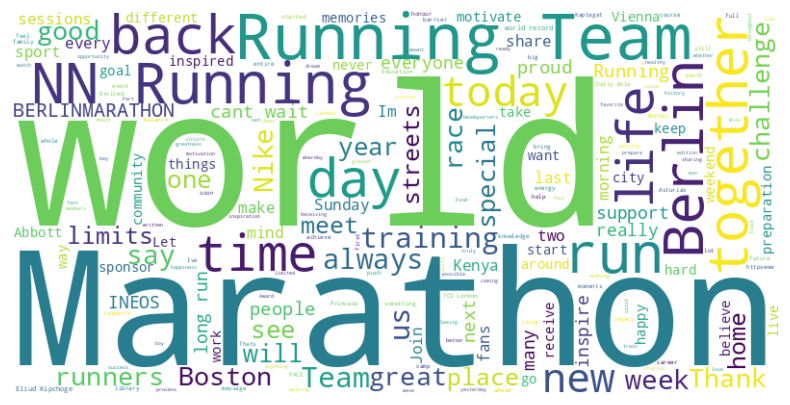

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(big_blob_of_text)

# Display the word cloud using matplotlib
mplt.figure(figsize=(10, 5))
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis('off')
mplt.show()

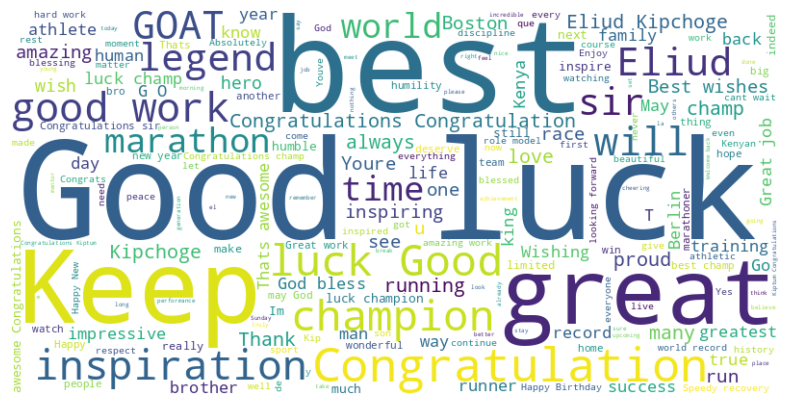

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(big_comment)

# Display the word cloud using matplotlib
mplt.figure(figsize=(10, 5))
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis('off')
mplt.show()

In [19]:
post_df_full["images_description"] = post_df_full["images_description"].apply(lambda x: '[]' if 'May be' not in x else x)
descriptions = list()
for i in range(len(post_df_full)):
    des = ast.literal_eval(post_df_full.loc[i, "images_description"])
    descriptions.append(copy.deepcopy(des))
post_df_full["images_description"] = descriptions

image_description_text = ""
for i in range(len(post_df_full)):
    for description in post_df_full.loc[i, "images_description"]:
        if "May be" in description:
            info = description.replace("May be an image of ", "")
            info = info.replace("May be", "")
            image_description_text += info
            image_description_text += ""

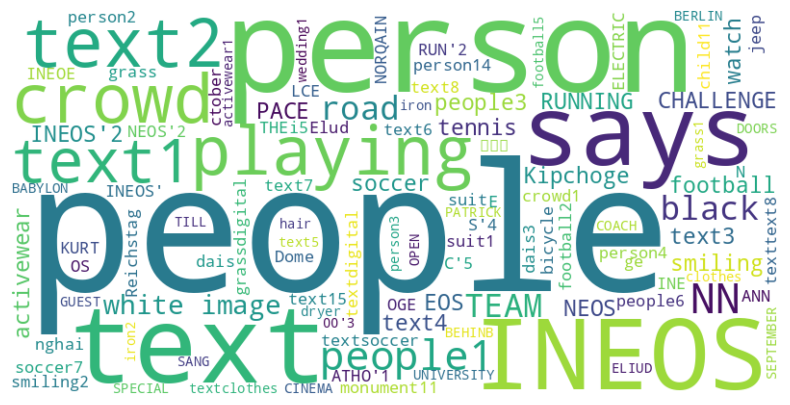

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(image_description_text)

# Display the word cloud using matplotlib
mplt.figure(figsize=(10, 5))
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis('off')
mplt.show()

In [23]:
df = pd.read_csv("cleaned.csv", low_memory=False)
for reaction in reactions:
    mean_value = df[df[reaction] != 0][reaction].median()
    df[reaction] = df[reaction].replace(0, math.ceil(mean_value))

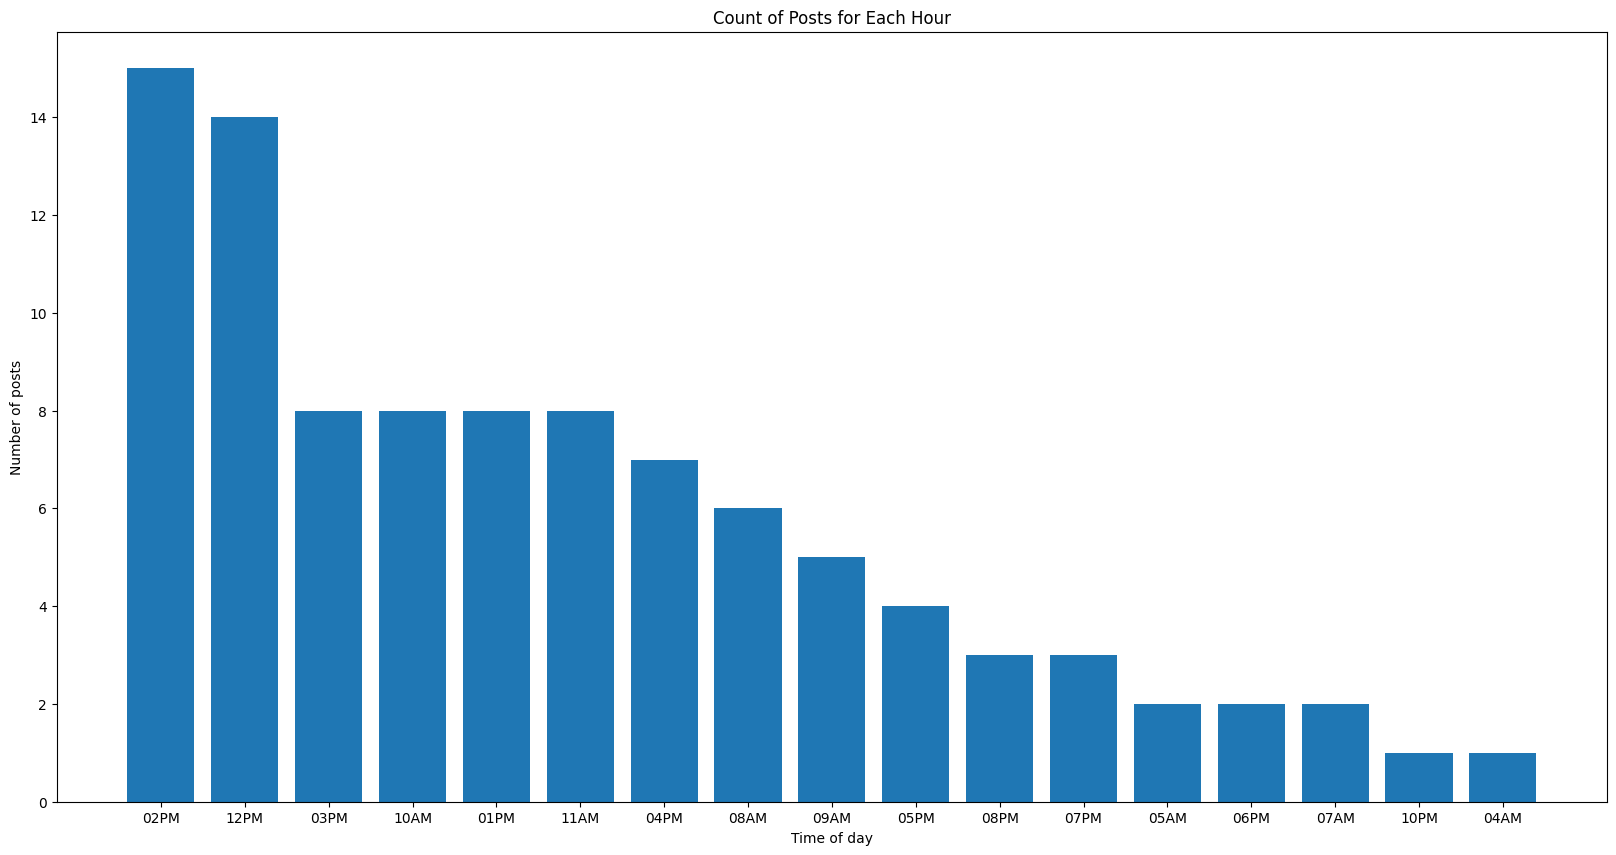

In [24]:
df['time'] = pd.to_datetime(df['time'])
df['new_column'] = df['time'].dt.strftime('%I%p')

counts = df['new_column'].value_counts()
counts = counts.sort_values(ascending=False)

mplt.figure(figsize=(20,10)) 
# Plotting
mplt.bar(counts.index, counts.values)
mplt.xlabel('Time of day')
mplt.ylabel('Number of posts')
mplt.title('Count of Posts for Each Hour')
mplt.show()

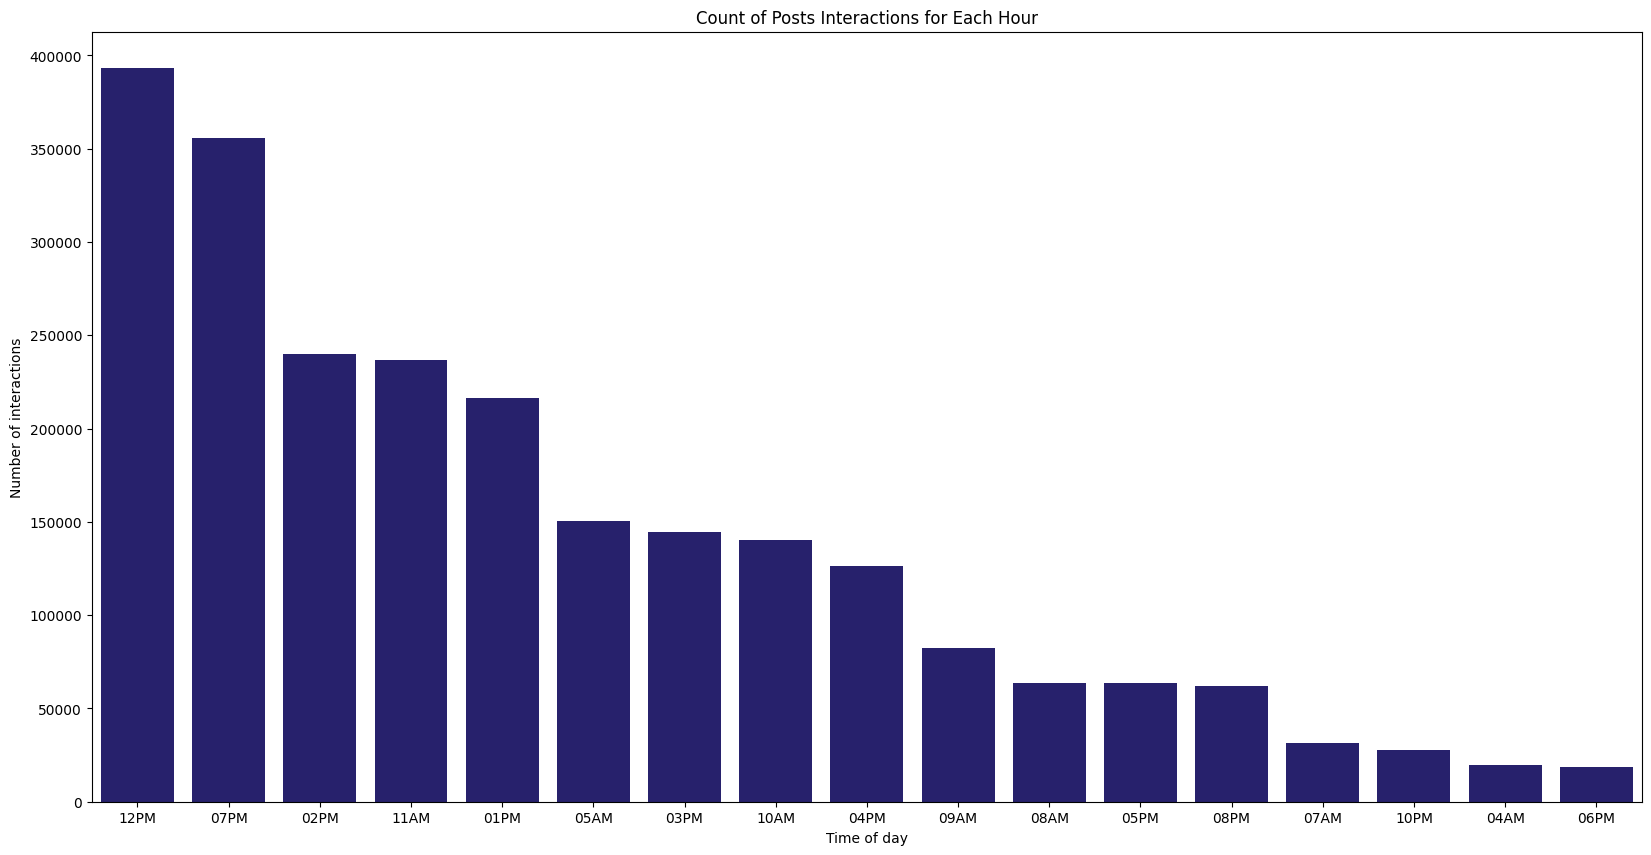

In [25]:
df['interactions'] = df[['reaction_count', 'comments', 'shares']].sum(axis=1)
sums = df.groupby('new_column')['interactions'].sum()
sums = sums.sort_values(ascending=False)

# Plotting
mplt.figure(figsize=(20,10)) 
# mplt.bar(sums.index, sums.values)
sn.barplot(x=sums.index, y=sums.values, color='#1C1478')
mplt.xlabel('Time of day')
mplt.ylabel('Number of interactions')
mplt.title('Count of Posts Interactions for Each Hour')
mplt.show()

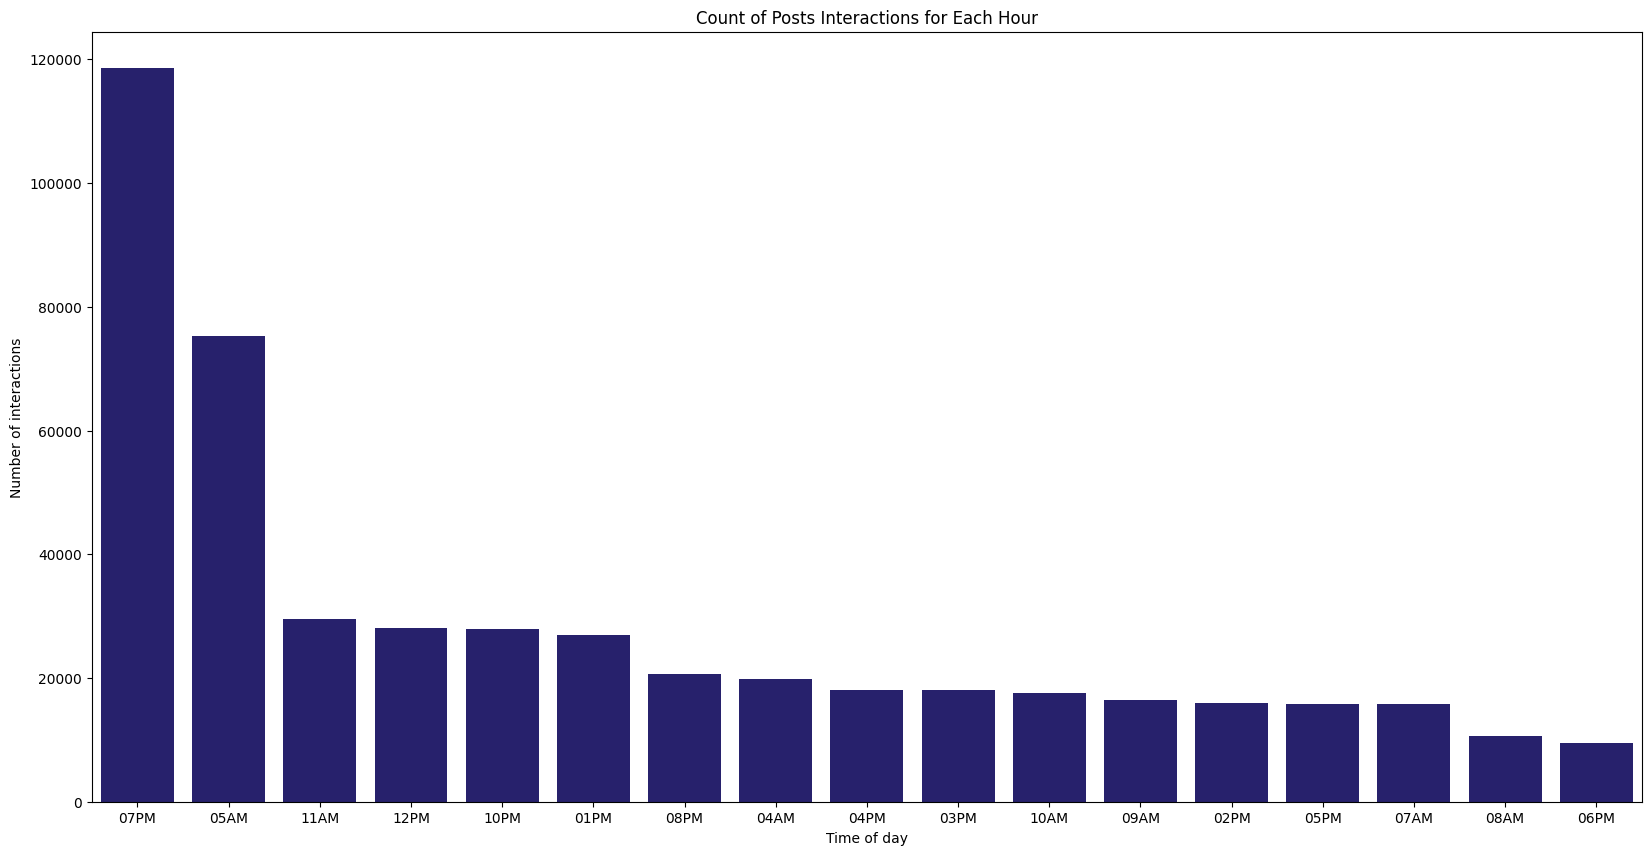

In [26]:
counts = df['new_column'].value_counts()
sums = df.groupby('new_column')['interactions'].sum()
avg_int = sums / counts
avg_int = avg_int.sort_values(ascending=False)
# Plotting
mplt.figure(figsize=(20,10)) 
# mplt.bar(sums.index, sums.values)
sn.barplot(x=avg_int.index, y=avg_int.values, color='#1C1478')
mplt.xlabel('Time of day')
mplt.ylabel('Number of interactions')
mplt.title('Count of Posts Interactions for Each Hour')
mplt.show()

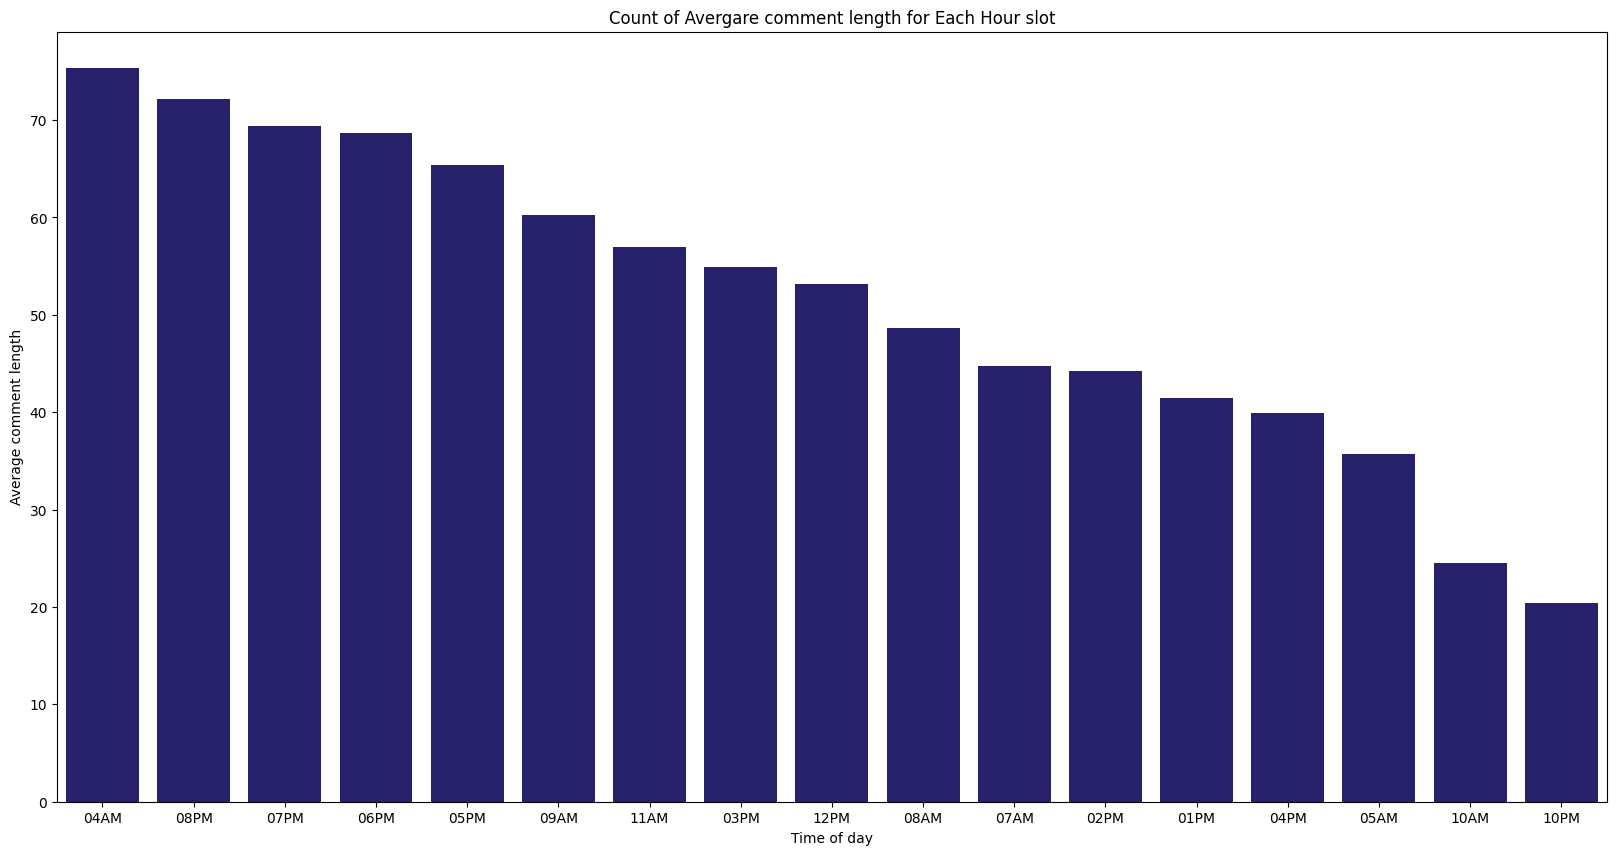

In [27]:
sums = (df.groupby('new_column')['avg_comment_length'].sum()) / counts
sums = sums.sort_values(ascending=False)

# Plotting
mplt.figure(figsize=(20,10)) 
# mplt.bar(sums.index, sums.values)
sn.barplot(x=sums.index, y=sums.values, color='#1C1478')
mplt.xlabel('Time of day')
mplt.ylabel('Average comment length')
mplt.title('Count of Avergare comment length for Each Hour slot')
mplt.show()

In [ ]:
# EXTRACT COUNTRIES OF PEOPLE WHO COMMENTED OR REACTED. RESULT STORED IN "interactors_place.txt"


# places = list()
# counter = 0
# def has_number_regex(line):
#     return bool(re.search(r'\d', line))
# with open("commentors_places.txt", 'r') as file:
#     for line in file:
#         if "exception" not in line and not has_number_regex(line):
#             places.append(line.strip())
# with open("reactors_ids.txt", 'r') as file:
#     for line in file:
#         if "exception" not in line and not has_number_regex(line):
#             places.append(line.strip())

# def process_text(text):
#     # Split the text based on commas
#     parts = text.split(',')

#     # Retain the last two parts, or all parts if there are fewer than two
#     result = parts[-2:] if len(parts) >= 2 else parts

#     # Join the result back into a string
#     result_text = ','.join(result)

#     return result_text
# placez = list()
# for i in places:
#     placez.append(process_text(i))

# geolocator = Nominatim(user_agent="my_geocoder")
# def get_country(city):
#     location = geolocator.reverse(geolocator.geocode(city).point, language='en')
#     if location:
#         return location.address.split(",")[-1].strip()
#     else:
#         return None
# places.clear()
# for i in placez:
#     c = get_country(i)
#     places.append(c)

In [28]:
with open("interactors_place.txt", 'r') as file:
   places = file.readlines()
places = [item.strip() for item in places]

df_c = pd.DataFrame({'Country': places})
# Count occurrences of each country
country_counts = df_c['Country'].value_counts()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

# # Plot the heatmap using plotly
# fig = px.choropleth(df_plot, locations="Country", locationmode="country names", color="Count", title="City Counts by Country",
#                     color_continuous_scale="Viridis", projection="natural earth")
fig = px.choropleth(df_plot, locations="Country", locationmode="country names", color="Count", color_continuous_scale="bluered")

# Show the plot
fig.show()